In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
output_data_file = "cities.csv"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [2]:
api_key = "04a65e208170e8b3660bbf00fc48f1a7"


In [3]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
lat_lngs = []
cities = []

In [5]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

647

In [6]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    try: 
        response = requests.get(query_url).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        
        record= record + 1
        
        time.sleep(2.01)
        
    except:
        print("City not found. Skipping...")
    continue










Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hilo
http://api.openweathermap.org/data/2.5/weather?&q=hilo
Processing Record 2 | La Ronge
http://api.openweathermap.org/data/2.5/weather?&q=la ronge
Processing Record 3 | Benguela
http://api.openweathermap.org/data/2.5/weather?&q=benguela
Processing Record 4 | Vardo
http://api.openweathermap.org/data/2.5/weather?&q=vardo
Processing Record 5 | Chapais
http://api.openweathermap.org/data/2.5/weather?&q=chapais
Processing Record 6 | Tura
http://api.openweathermap.org/data/2.5/weather?&q=tura
Processing Record 7 | Cotonou
http://api.openweathermap.org/data/2.5/weather?&q=cotonou
Processing Record 8 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia
Processing Record 9 | North Bend
http://api.openweathermap.org/data/2.5/weather?&q=north bend
Processing Record 10 | Albany
http://api.openweathermap.org/data/2.5/weather?&q=albany
City not found. Skipping...
Processing Record 11 | Atuona
http://api.o

In [7]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [8]:
weather_data = pd.DataFrame(weatherpy_dict)
weather_data.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [53]:
weather_data.to_csv('weather_data.csv')

In [54]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,80,US,1554209902,87,19.71,-155.08,66.99,1.99
1,La Ronge,20,CA,1554206400,66,55.10,-105.30,15.80,6.93
2,Benguela,0,AO,1554209929,89,-12.58,13.40,85.77,7.99
3,Vardo,5,US,1554209935,74,39.62,-77.74,41.00,4.63
4,Chapais,90,CA,1554206400,85,49.78,-74.86,21.20,11.41


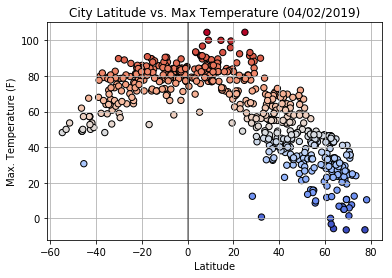

In [100]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], s = 40, c=weather_data["Max Temp"],edgecolor="black",
            linewidths=1, marker="o", 
            cmap='coolwarm')
            
plt.title("City Latitude vs. Max Temperature (04/02/2019)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

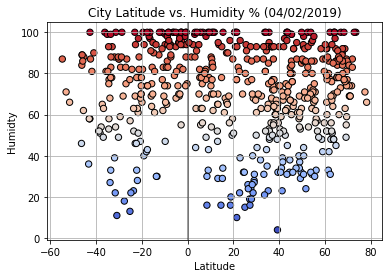

In [101]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], s = 40, c=weather_data["Humidity"],edgecolor="black",
            linewidths=1, marker="o", 
            cmap='coolwarm')
            
plt.title("City Latitude vs. Humidity % (04/02/2019)")
plt.ylabel("Humidty")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Humidity.png")

plt.show()

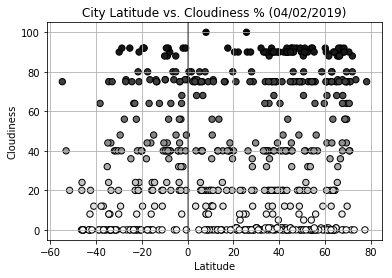

In [102]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], s = 40, c=weather_data["Cloudiness"],edgecolor="black", 
            linewidths=1, marker="o", cmap='binary')
            
plt.title("City Latitude vs. Cloudiness % (04/02/2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Cloudiness.png")

plt.show()

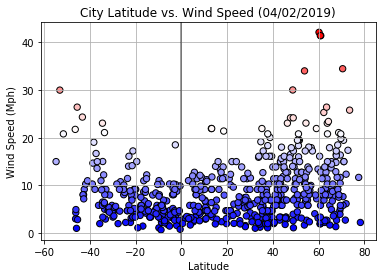

In [103]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], s = 40, c=weather_data["Wind Speed"],edgecolor="black",
            linewidths=1, marker="o", cmap='bwr')
            
plt.title("City Latitude vs. Wind Speed (04/02/2019)")
plt.ylabel("Wind Speed (Mph)")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Max_Temp_vs_Wind_Speed.png")

plt.show()

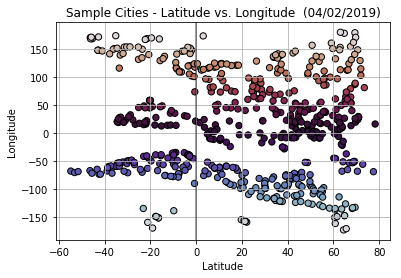

In [105]:
plt.scatter(weather_data["Lat"], weather_data["Lng"], s = 40, c=weather_data["Lng"],edgecolor="black",
            linewidths=1, marker="o", cmap='twilight')
            
plt.title("Sample Cities - Latitude vs. Longitude  (04/02/2019)")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.axvline(0, color = 'black', alpha = .5)
plt.grid(True)

plt.savefig("Sample_Cities_Lat_Lng.png")

plt.show()